### Dataset cereales

En el siguiente dataset se encuentra información sobre diferentes cereales.

Las categorías en las columnas son:
       
   * **name** : Nombre del fabricante
      * A = American Home Food Products
      * G = General Mills
      * K = Kelloggs
      * N = Nabisco
      * P = Post
      * Q = Quaker Oats
      * R = Ralston Purina 
   
   
   *  **type**:
      * C = frío  
      * H = caliente 
        
   
   *  **calories**: calorias por porción
   *  **protein**:  gramos de proteinas
   *  **fat**:      gramos de grasa
   *  **sodium**:   miligramos de sodio
   *  **fiber**:    gramos de fibra dietética
   *  **arbo**:     gramos de azúcares complejos
   *  **sugars**:   gramos de azúcares simples
   *  **potass**:   miligramos de K
   *  **vitamins**: vitaminas y minerales - 0, 25, o 100, indicando el % recomendado por la FDA.
   *  **shelf**:    display shelf (1, 2, or 3, counting from the floor)
   *  **weight**:   peso en onzas de una porción
   *  **cups**:     numero de copas en una porción 
   *  **rating**:   clasificación de los cereales (Possibly from Consumer Reports?)
        
A partir de ésta información:
     
  * Caracterizar el tipo de dato de cada columna (_string, int, float_) y,
  * Reconocer el tipo variable (_continua, categórica_).

### Leer el Archivo 'cereal.csv'.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

#### Imprimir 5 muestras para reconocimiento de datos,  ¿Coinciden con las caracterizaciones realizadas?

In [6]:
df = pd.read_csv('cereal.csv')
df.sample(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
23,Double Chex,R,C,100,2,0,190,1.0,18.0,5,80,25,3,1.0,0.75,44.330856
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.0,0.67,53.313813
17,Corn Pops,K,C,110,1,0,90,1.0,13.0,12,20,25,2,1.0,1.00,35.782791
47,Multi-Grain Cheerios,G,C,100,2,1,220,2.0,15.0,6,90,25,1,1.0,1.00,40.105965
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174


#### Tomar una columna categórica a elección y convertir en una variable dummie.

Se puede utilizar la función ```pd.get_dummies()```.


In [7]:
dummies = pd.get_dummies(df.loc[:,'mfr'])
dummies.head()

,A,G,K,N,P,Q,R
0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1


##### Tomar la columna de fabricante, transformar a variable dummie y contar cuantos productos son de Kelloggs.

In [8]:
dummies['K'].sum()

23

##### Ordenar los fabricantes por cantidad de productos en orden descendente y presentarlo en un gráfico.

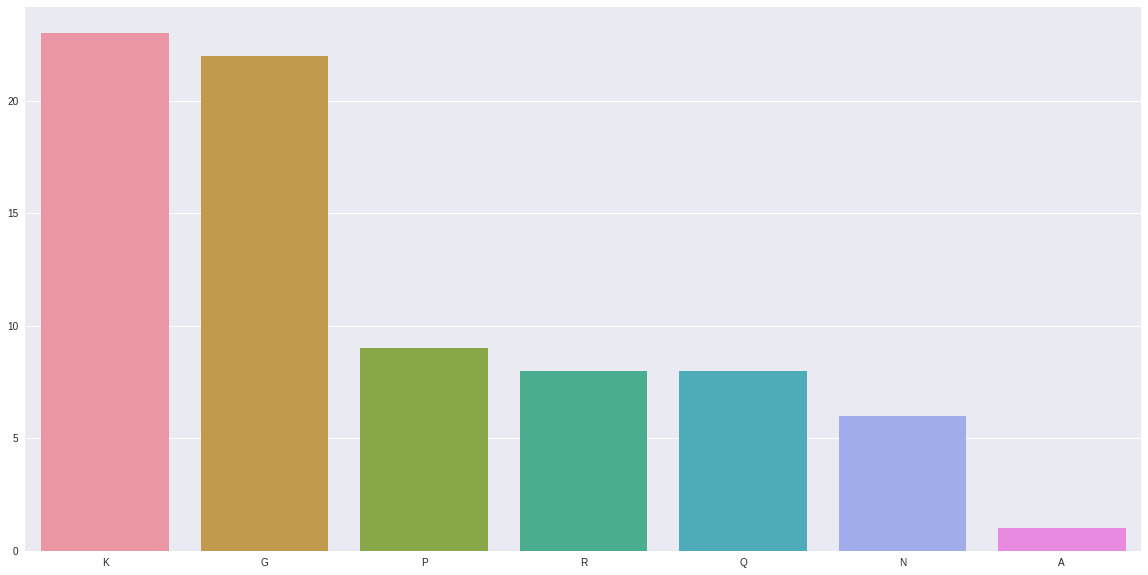

In [12]:
import matplotlib.pyplot as plt

manf_sort = pd.get_dummies(df['mfr']).sum().sort_values(ascending = False)
plt.figure(figsize=(20,10))
sns.barplot(manf_sort.index,manf_sort.values)

plt.show()

##### La función ```pd.get_dummies()``` permite tomar mas de una columna, por ejemplo, utilizando slicing. 
##### Tomar las columnas 'mfr' y 'type',  y convertirlas en variables dummies simultáneamente, obtener una descripción de ese dataframe.

In [13]:
pd.get_dummies(df.loc[:,'mfr':'type']).describe()

,mfr_A,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_C,type_H
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.012987,0.285714,0.298701,0.077922,0.116883,0.103896,0.103896,0.961039,0.038961
std,0.113961,0.454716,0.460690,0.269807,0.323388,0.307127,0.307127,0.194771,0.194771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


¿Cómo se separan las categorías?, ¿Que son los prefijos de cada columna?.

¿Cuánto suman las medias de cada categoría?

Verificar que el desvio estandar sea igual a $\sqrt{ pq }$ de la variable dummie.

#### Elegir un fabricante y resolver las siguientes propuestas:
       
   * Si en un supermercado entran 2000 personas de las cuales 50 van a comprar cereales y elijen una caja aleatoriamente por persona:
       
   * Describir la función binomial (_n, p_), que modela el problema y graficar un histograma obteniendo muestras que sigan esa tendencia con la función ``` np.random.binomial()```. (Ver notebook de clase 9)

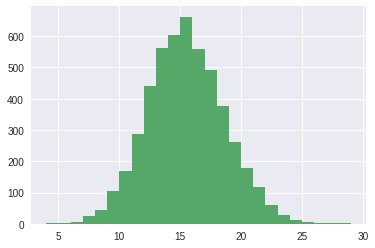

In [25]:
# definimos la cantidad de ensayos.
cantidad_ensayos = 5000

# definimos la cantidad de personas que compran cereal.
compradores_cereal = 50

# definimos la probabilidad de que compren el cereal del fabricante elegido.
probabilidad_compra = 0.298701

# binomial devuelve el número de éxitos de cada vez que se realizo un ensayo de 50 compradores.
samples_binomial = np.random.binomial(n =compradores_cereal, p = probabilidad_compra, size = cantidad_ensayos)
samples_binomial

# construccion de grafico
sns.distplot(samples_binomial, kde = 0, bins=np.arange(samples_binomial.min(), samples_binomial.max() + 1));

plt.hist(samples_binomial,bins=np.arange(samples_binomial.min(), samples_binomial.max() + 1))
plt.show()